# Comparing Positive, Negative, and Equivocal Samples

This noteboook compares her2 scores and her2 percent positive across positive, negative, and equivocal samples. For now, this is devoid of machine learning data.

In [13]:
require(readr)
require(ggplot2)
require(reshape2)

Loading required package: ggplot2
Loading required package: reshape2


>`gene.expr` contains gene expression data. This may or may not prove useful.

>`her2.data` contains her2 clinical data.

In [2]:
gene.expr <- as.data.frame(read_tsv('../data/GSM1536837_06_01_15_TCGA_24.tumor_Rsubread_FeatureCounts.txt.gz'))
her2.data <- as.data.frame(read_tsv('../data/her2_Clinical_Data.tsv'))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_integer(),
  X1 = col_character()
)
See spec(...) for full column specifications.
Warning message:
“Missing column names filled in: 'X1' [1], 'X2' [2], 'X3' [3]”Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


>I like samples to be rows and different variables to be columns. Also, we may want to merge these dataframes at some point, so I will transpose them.

In [3]:
row.names(gene.expr) <- gene.expr$X1
gene.expr$X1 <- NULL
row.names(her2.data) <- her2.data$X1
her2.data$X1 <- NULL
her2.data$X2 <- NULL
her2.data$X3 <- NULL

gene.expr <- as.data.frame(t(gene.expr))
her2.data <- as.data.frame(t(her2.data))

In [4]:
gene.expr
her2.data

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. repr_matrix_generic(obj, sprintf("\\begin{tabular}{%s}\n%%s%%s\\end{tabular}\n", 
 .     cols), "%s\\\\\n\\hline\n", "  &", " %s &", "%s", "\t%s\\\\\n", 
 .     "%s &", " %s &", escape_fun = latex_escape_vec, ...)
10. sprintf(

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,tAKR
TCGA-02-0047-01A-01R-1849-01,30,277,38,1,118,65901,98,4,87,4,⋯,805,283,568,2094,3,2140,7966,2691,1135,1
TCGA-02-0055-01A-01R-1849-01,32,889,47,3,183,90779,8,2,1069,3,⋯,543,198,513,1291,16,1862,25095,1329,1469,1
TCGA-02-2483-01A-01R-1849-01,51,784,51,1,91,58260,17,8,242,2,⋯,1864,138,1022,2349,122,3125,14291,2229,1835,0
TCGA-02-2485-01A-01R-1849-01,35,162,27,1,319,19214,544,6,392,1,⋯,1096,321,590,3249,1,2491,12796,2688,1660,1
TCGA-02-2486-01A-01R-1849-01,26,203,25,1,339,78833,240,5,84,1,⋯,152,171,335,1251,0,1258,15071,1210,1029,0
TCGA-04-1331-01A-01R-1569-13,87,884,156,5,228,17731,691,5,1338,12,⋯,4482,407,1073,3538,442,5011,18285,2250,2227,0
TCGA-04-1332-01A-01R-1564-13,29,139,25,5,159,24923,379,9,1438,7,⋯,824,341,666,2233,51,1126,18063,3320,616,2
TCGA-04-1337-01A-01R-1564-13,176,725,181,8,458,27615,15,8,1981,12,⋯,2506,388,927,4927,411,2237,73420,4438,1962,2
TCGA-04-1338-01A-01R-1564-13,19,153,17,4,126,4382,217,3,262,2,⋯,714,96,286,1397,24,1120,18325,769,445,2
TCGA-04-1341-01A-01R-1564-13,45,1239,46,6,250,4407,42,4,929,1,⋯,3392,396,913,3310,75,1006,63062,2637,894,1


,her2_status_by_ihc,her2_ihc_percent_positive,her2_ihc_score,her2_positivity_scale_other,her2_positivity_method_text,her2_fish_status,her2_copy_number,her2_and_cent17_cells_count,her2_cent17_ratio,her2_and_cent17_scale_other,⋯,nte_her2_status_ihc__positive,nte_her2_positivity_ihc_score,nte_her2_positivity_other_scale,nte_her2_positivity_method,nte_her2_fish_status,nte_her2_signal_number,her2_cent17_counted_cells_count,nte_cent_17_her2_ratio,nte_cent17_her2_other_scale,nte_her2_fish_define_method
TCGA-G9-A9S0-01A-11R-A41O-07,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TCGA-E1-5318-01A-01R-1470-07,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TCGA-25-1625-01A-01R-1566-13,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TCGA-A2-A0T1-01A-21R-A084-07,Positive,[Not Available],3+,[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-ER-A19N-06A-11R-A18S-07,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TCGA-44-4112-01A-01R-A278-07,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TCGA-A7-A3J0-01A-11R-A213-07,Negative,[Not Available],1+,[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-85-8350-01A-11R-2296-07,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TCGA-FE-A236-01A-11R-A16R-07,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TCGA-XK-AAIW-01A-11R-A41O-07,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [11]:
her2.data <- her2.data[which(her2.data$her2_status_by_ihc == "Positive" | her2.data$her2_status_by_ihc == "Negative" | her2.data$her2_status_by_ihc == "Equivocal"), 
                       c("her2_status_by_ihc", "her2_ihc_percent_positive")]
gene.expr <- gene.expr[which(row.names(gene.expr) %in% row.names(her2.data)), ]

In [12]:
gene.expr
her2.data

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. repr_matrix_generic(obj, sprintf("\\begin{tabular}{%s}\n%%s%%s\\end{tabular}\n", 
 .     cols), "%s\\\\\n\\hline\n", "  &", " %s &", "%s", "\t%s\\\\\n", 
 .     "%s &", " %s &", escape_fun = latex_escape_vec, ...)
10. sprintf(

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,tAKR
TCGA-3C-AAAU-01A-11R-A41B-07,107,462,135,1,363,17802,25,0,225,33,⋯,2986,851,2586,5136,860,3663,11028,5796,3615,0
TCGA-3C-AALI-01A-11R-A41B-07,49,457,139,17,153,14734,20,3,317,2,⋯,1965,301,782,2727,447,1144,10908,2552,791,1
TCGA-3C-AALK-01A-11R-A41B-07,36,478,70,4,164,27976,9,3,1320,0,⋯,1773,332,981,2207,499,1551,14644,2030,1807,1
TCGA-4H-AAAK-01A-12R-A41B-07,47,624,105,2,405,23915,19,4,848,2,⋯,1793,275,934,2601,50,1959,10156,2050,2175,4
TCGA-5L-AAT0-01A-12R-A41B-07,27,363,57,0,213,22176,10,4,688,7,⋯,816,309,1043,2036,38,1151,7543,1656,1883,1
TCGA-5L-AAT1-01A-12R-A41B-07,22,262,71,1,135,19777,12,6,345,1,⋯,740,171,683,1320,80,661,5757,1833,742,2
TCGA-5T-A9QA-01A-11R-A41B-07,24,626,38,33,504,6426,1,1,816,11,⋯,3524,183,533,1643,5,664,6530,2220,894,0
TCGA-A1-A0SB-01A-11R-A144-07,50,102,37,7,107,78624,20,23,869,4,⋯,850,562,1106,3435,69,3251,15393,4723,3472,2
TCGA-A1-A0SD-01A-11R-A115-07,35,463,99,4,241,77611,54,14,1233,4,⋯,2244,778,1652,4008,139,2859,11636,4105,3855,0
TCGA-A1-A0SE-01A-11R-A084-07,27,622,104,1,261,51671,11,4,903,0,⋯,2742,747,2014,3299,215,3091,9940,3028,3511,0


,her2_status_by_ihc,her2_ihc_percent_positive,her2_ihc_score,her2_positivity_scale_other,her2_positivity_method_text,her2_fish_status,her2_copy_number,her2_and_cent17_cells_count,her2_cent17_ratio,her2_and_cent17_scale_other,⋯,nte_her2_status_ihc__positive,nte_her2_positivity_ihc_score,nte_her2_positivity_other_scale,nte_her2_positivity_method,nte_her2_fish_status,nte_her2_signal_number,her2_cent17_counted_cells_count,nte_cent_17_her2_ratio,nte_cent17_her2_other_scale,nte_her2_fish_define_method
TCGA-A2-A0T1-01A-21R-A084-07,Positive,[Not Available],3+,[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-A7-A3J0-01A-11R-A213-07,Negative,[Not Available],1+,[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-AO-A126-01A-11R-A10J-07,Negative,<10%,1+,[Not Available],3+ Positive,Negative,74,30,1.1,[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-E2-A14X-01A-11R-A115-07,Negative,<10%,1+,[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-AR-A0TP-01A-11R-A084-07,Negative,[Not Available],[Not Available],[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-E2-A15S-01A-11R-A115-07,Equivocal,[Not Available],2+,[Not Available],[Not Available],Negative,[Not Available],[Not Available],[Not Available],[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-A2-A1FW-01A-11R-A13Q-07,Negative,[Not Available],[Not Available],[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-HN-A2OB-01A-21R-A27Q-07,Negative,[Not Available],[Not Available],[Not Available],[Not Available],Negative,2.0,60,1.2,[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-LL-A440-01A-11R-A24H-07,Equivocal,[Not Available],2+,[Not Available],[Not Available],Negative,79,20,1.7,[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]
TCGA-E2-A14T-01A-11R-A115-07,Negative,[Not Available],1+,[Not Available],[Not Available],Negative,[Not Available],[Not Available],1.29,[Not Available],⋯,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available]


In [15]:
merge(her2.data, gene.expr, by = 'row.names')

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. repr_matrix_generic(obj, sprintf("\\begin{tabular}{%s}\n%%s%%s\\end{tabular}\n", 
 .     cols), "%s\\\\\n\\hline\n", "  &", " %s &", "%s", "\t%s\\\\\n", 
 .     "%s &", " %s &", escape_fun = latex_escape_vec, ...)
10. sprintf(

Row.names,her2_status_by_ihc,her2_ihc_percent_positive,her2_ihc_score,her2_positivity_scale_other,her2_positivity_method_text,her2_fish_status,her2_copy_number,her2_and_cent17_cells_count,her2_cent17_ratio,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,tAKR
TCGA-3C-AAAU-01A-11R-A41B-07,Negative,[Not Available],[Not Available],[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],⋯,2986,851,2586,5136,860,3663,11028,5796,3615,0
TCGA-3C-AALI-01A-11R-A41B-07,Positive,[Not Available],[Not Available],[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],⋯,1965,301,782,2727,447,1144,10908,2552,791,1
TCGA-3C-AALK-01A-11R-A41B-07,Positive,[Not Available],[Not Available],[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],⋯,1773,332,981,2207,499,1551,14644,2030,1807,1
TCGA-4H-AAAK-01A-12R-A41B-07,Equivocal,10-19%,2+,[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],⋯,1793,275,934,2601,50,1959,10156,2050,2175,4
TCGA-5L-AAT0-01A-12R-A41B-07,Negative,[Not Available],1+,[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],⋯,816,309,1043,2036,38,1151,7543,1656,1883,1
TCGA-5L-AAT1-01A-12R-A41B-07,Equivocal,[Not Available],2+,CISH,CISH,[Not Evaluated],[Not Available],[Not Available],[Not Available],⋯,740,171,683,1320,80,661,5757,1833,742,2
TCGA-5T-A9QA-01A-11R-A41B-07,Equivocal,10-19%,2+,[Not Available],[Not Available],Negative,[Not Available],[Not Available],[Not Available],⋯,3524,183,533,1643,5,664,6530,2220,894,0
TCGA-A1-A0SB-01A-11R-A144-07,Negative,[Not Available],[Not Available],[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],⋯,850,562,1106,3435,69,3251,15393,4723,3472,2
TCGA-A1-A0SD-01A-11R-A115-07,Negative,[Not Available],[Not Available],[Not Available],[Not Available],[Not Evaluated],[Not Available],[Not Available],[Not Available],⋯,2244,778,1652,4008,139,2859,11636,4105,3855,0
TCGA-A1-A0SE-01A-11R-A084-07,Negative,[Not Available],1+,[Not Available],[Not Available],Negative,2,[Not Available],1,⋯,2742,747,2014,3299,215,3091,9940,3028,3511,0


## Heatmaps

My first course of action will be to make simple heat maps comparing percent positive and her2 scores across status. This is only slightly useful since the Negative-<10% bin skews the visuals and makes it hard to distinguish between the other bins. Thus, I will also make individual histograms showing the separation between the statuses.

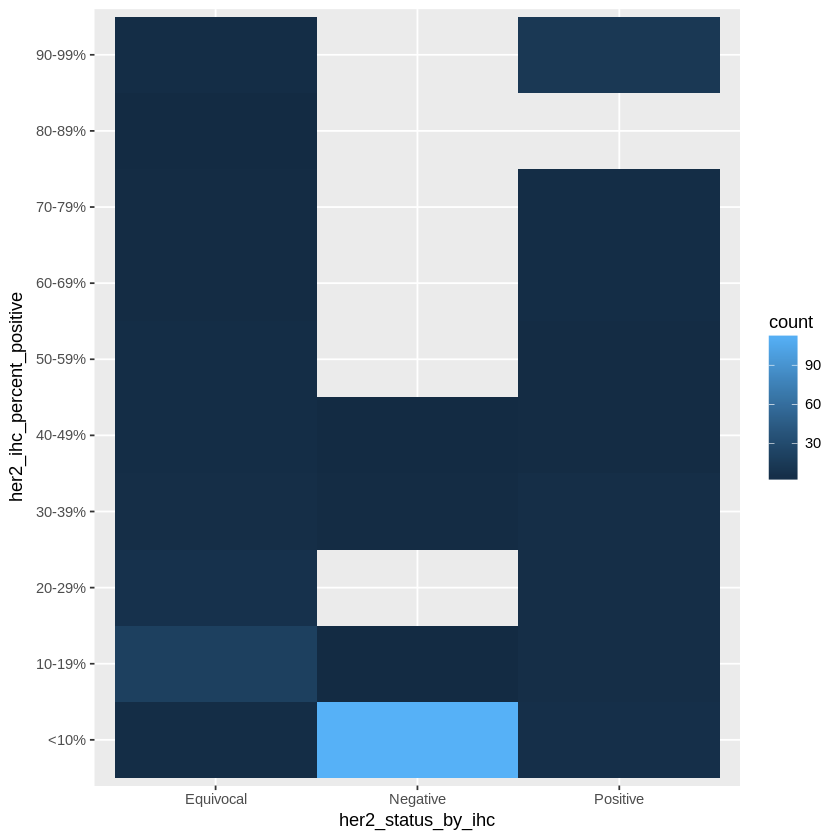

In [25]:
gdot <- ggplot(her2.data[which(her2.data$her2_ihc_percent_positive != '[Not Available]'), ], aes(x = her2_status_by_ihc, y = her2_ihc_percent_positive))
ggdot <- gdot + geom_bin2d()

ggdot

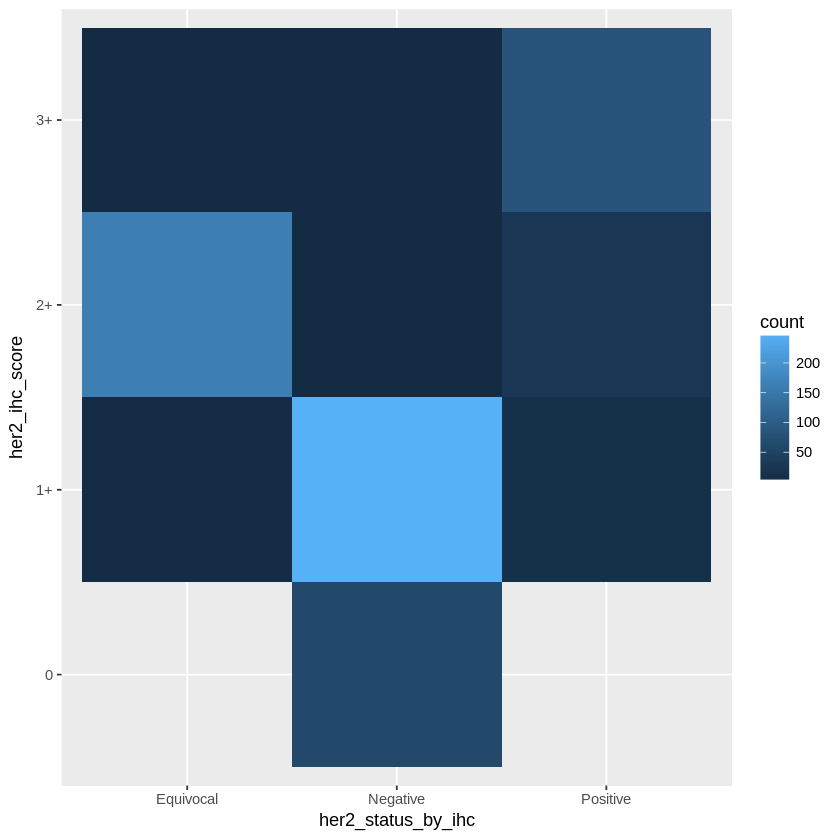

In [26]:
gdot <- ggplot(her2.data[which(her2.data$her2_ihc_score != '[Not Available]'), ], aes(x = her2_status_by_ihc, y = her2_ihc_score))
ggdot <- gdot + geom_bin2d()

ggdot

This one is a little more telling since we can clearly see that a good amount of Negative sample intersects with 1+, Equivocal with 2+, and Positive with 3+.

## Histograms

Here I divide up by status so we can see where most samples within a certain status fall.

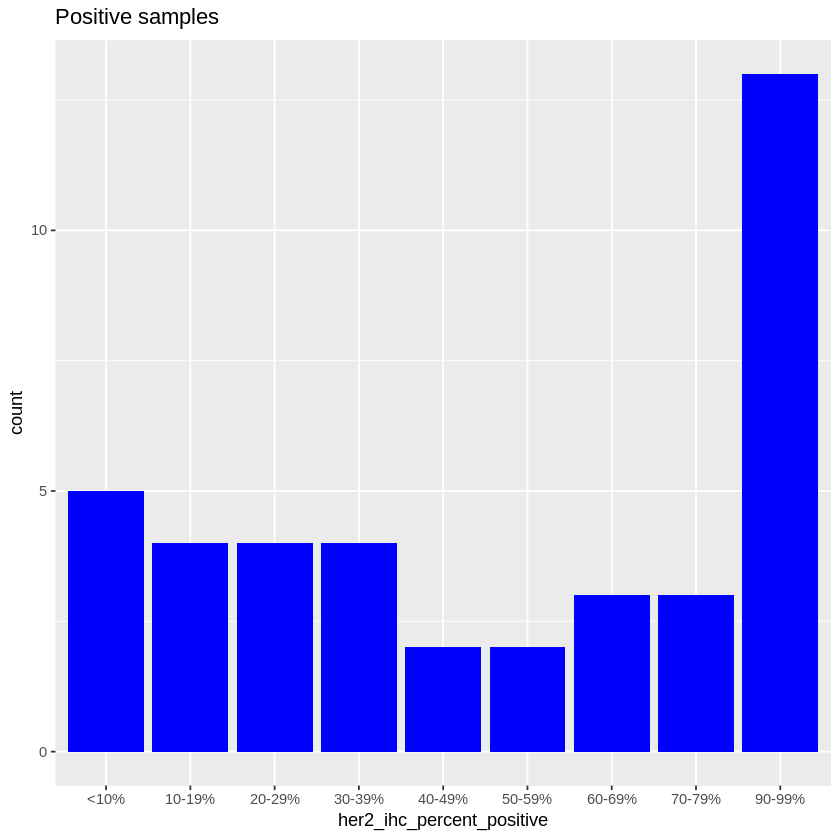

In [30]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_percent_positive != '[Not Available]' & her2.data$her2_status_by_ihc == "Positive"), ], 
               aes(x = her2_ihc_percent_positive))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Positive samples")

ggbar

It is important to note here that there is no 80-89% group with Positive samples.

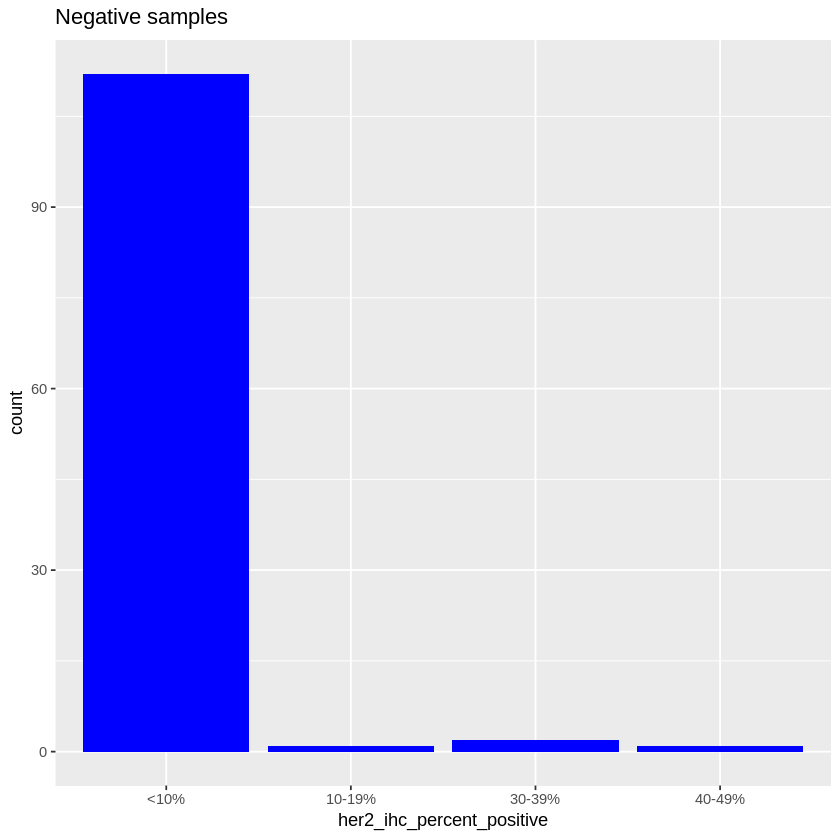

In [31]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_percent_positive != '[Not Available]' & her2.data$her2_status_by_ihc == "Negative"), ], 
               aes(x = her2_ihc_percent_positive))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Negative samples")

ggbar

Again, the sheer amount of Negative-<10% samples far outweighs others. This is to be expected if we trust the way we judge percent positivity and classify status.

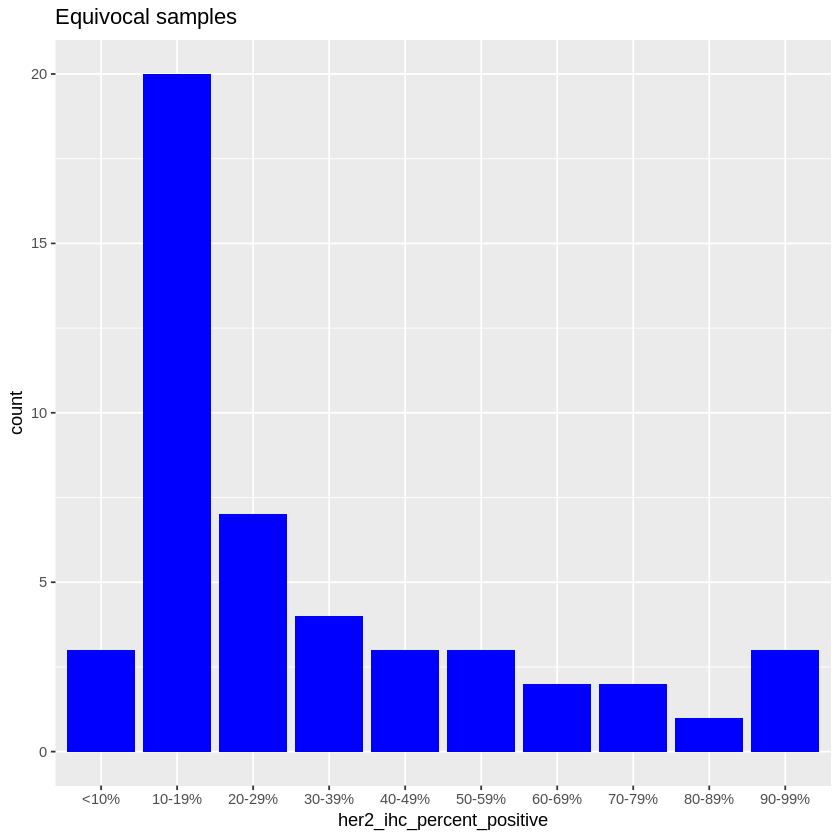

In [32]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_percent_positive != '[Not Available]' & her2.data$her2_status_by_ihc == "Equivocal"), ], 
               aes(x = her2_ihc_percent_positive))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Equivocal samples")

ggbar

It seems there are Equivocal samples all across the board. However, it does appear that a good portion are found in the 10-19% range. This is likely because it is slightly higher than an almost certain negative, but is still not high enough to be sure. Thus, it is an ambiguous area that is classified as "Equivocal". However, the majority of the samples are still found outside of this range...

In [38]:
nrow(her2.data[which(her2.data$her2_ihc_percent_positive == "10-19%"),]) / 
        nrow(her2.data[which(her2.data$her2_ihc_percent_positive != "10-19%" & her2.data$her2_ihc_percent_positive != "[Not Available]"),])

[1] 0.1396648

Only 14% of the samples are found within this range. We could also consider 20-29% and 30-39%

In [40]:
nrow(her2.data[which(her2.data$her2_ihc_percent_positive %in% c("10-19%", "20-29%", "30-39%")),]) / 
        nrow(her2.data[which(!(her2.data$her2_ihc_percent_positive %in% c("10-19%", "20-29%", "30-39%", "[Not Available]"))),])

[1] 0.2911392

How many are in each of these groups?

In [42]:
nrow(her2.data[which(her2.data$her2_ihc_percent_positive == "10-19%"),])
nrow(her2.data[which(her2.data$her2_ihc_percent_positive != "10-19%" & her2.data$her2_ihc_percent_positive != "[Not Available]"),])
nrow(her2.data[which(her2.data$her2_ihc_percent_positive %in% c("10-19%", "20-29%", "30-39%")),])
nrow(her2.data[which(!(her2.data$her2_ihc_percent_positive %in% c("10-19%", "20-29%", "30-39%", "[Not Available]"))),])

[1] 25

[1] 179

[1] 46

[1] 158

Nuts. That math adds up. Anyway, my point is that while the 10-19% group makes it most likely to be considered 'Equivocal', it could happen anywhere.

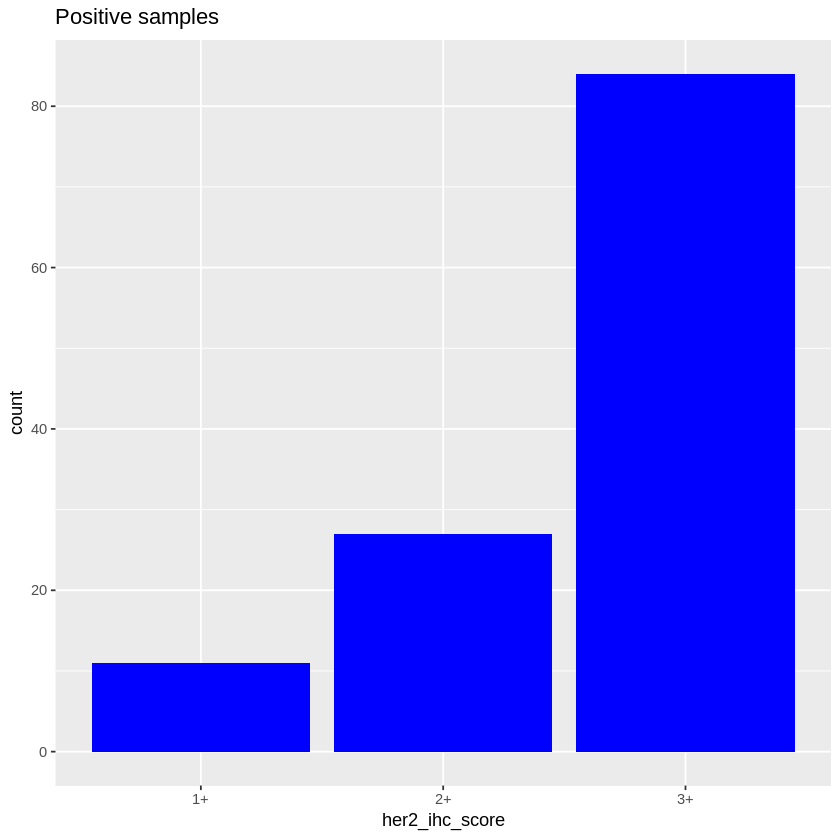

In [34]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_score != '[Not Available]' & her2.data$her2_status_by_ihc == "Positive"), ], 
               aes(x = her2_ihc_score))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Positive samples")

ggbar

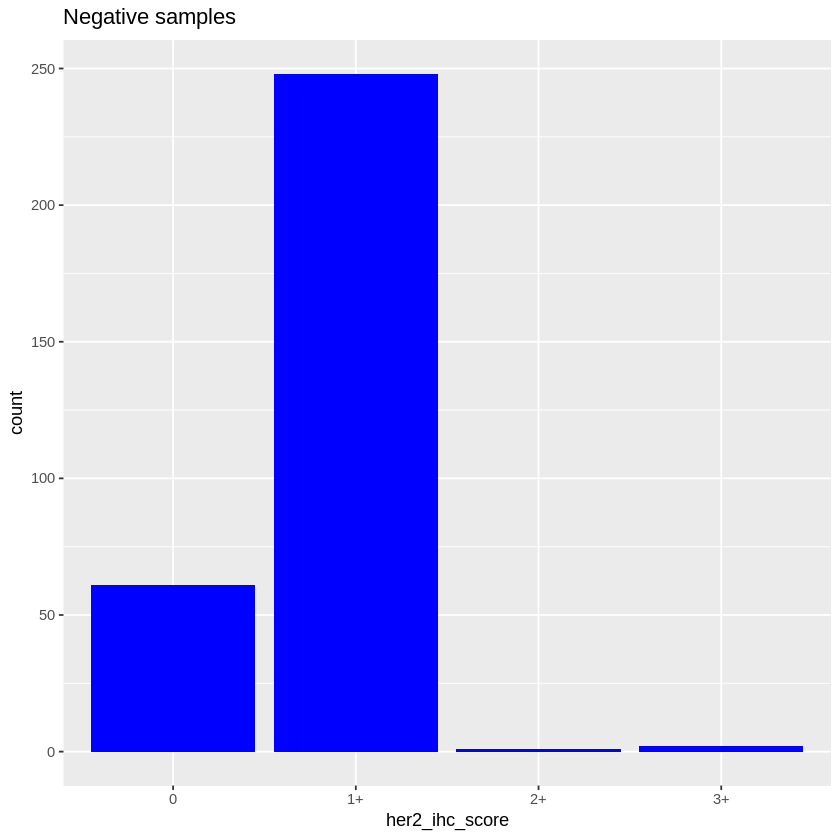

In [35]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_score != '[Not Available]' & her2.data$her2_status_by_ihc == "Negative"), ], 
               aes(x = her2_ihc_score))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Negative samples")

ggbar

__SPOILER ALERT:__ It looks like a her2 score of 0 ensures Negativity.

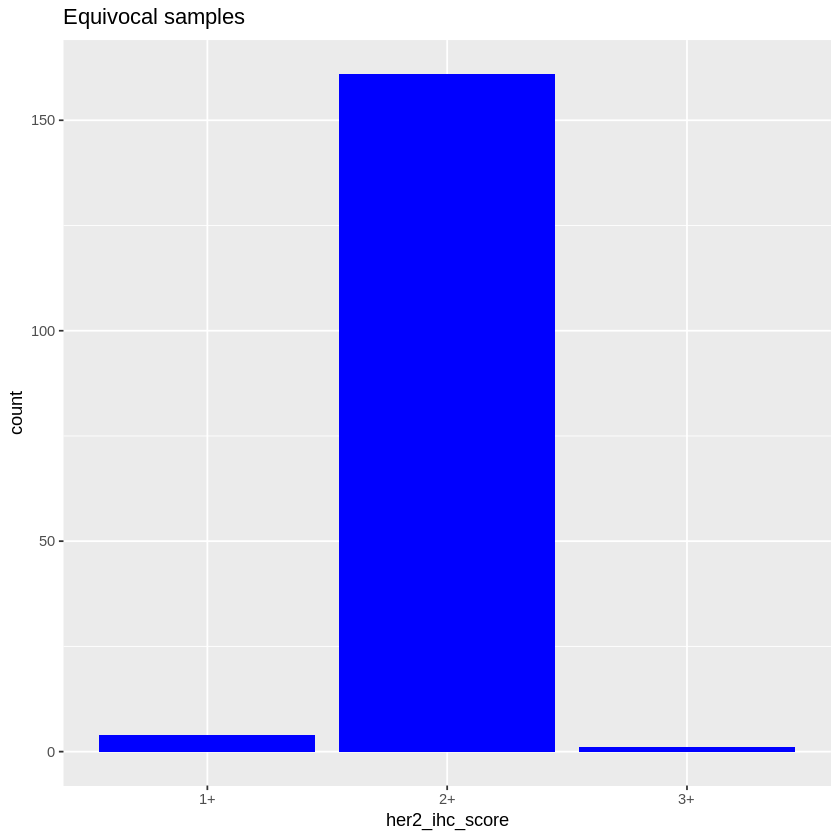

In [36]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_score != '[Not Available]' & her2.data$her2_status_by_ihc == "Equivocal"), ], 
               aes(x = her2_ihc_score))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Equivocal samples")

ggbar